In [1]:
from cpclasses import *
from importlib import reload

import GraphNeuralNetworks
reload(GraphNeuralNetworks)
from GraphNeuralNetworks import *

In [2]:
#Dataset:

g0 = Data(edge_index=torch.tensor([
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4],
    [0, 1, 3, 0, 1, 2, 1, 2, 4, 0, 3, 2, 4]]), pos=torch.tensor([[4.963, 7.682],
    [3.074, 6.341],[3.489, 4.017],[6.977, 8.   ],[1.61 , 2.823]],dtype=torch.float32),
    y=torch.tensor([2, 2, 2, 1, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g1 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4],
    [0, 1, 2, 3, 0, 1, 0, 2, 4, 0, 3, 2, 4]]), pos=torch.tensor([[4.963, 4.012],
    [6.806, 5.142],[4.431, 6.432],[5.159, 1.636],[1.955, 6.691]], dtype=torch.float32),
    y=torch.tensor([3, 1, 2, 1, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g2 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4],
    [0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 0, 2, 3, 2, 4]]), pos=torch.tensor([[7.698, 7.945],
    [5.712, 7.06 ],[7.608, 5.876],[9.736, 6.541],[6.81 , 3.582]], dtype=torch.float32),
    y=torch.tensor([3, 2, 4, 2, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g3 = Data(edge_index=torch.tensor([
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    [0, 1, 2, 0, 1, 4, 0, 2, 3, 2, 3, 4, 1, 3, 4]]), pos=torch.tensor([[4.488, 7.382],
    [5.241, 9.701],[5.269, 5.412],[7.128, 6.766],[7.317, 8.692]], dtype=torch.float32),
    y=torch.tensor([2, 2, 2, 2, 2.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g4 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    [0, 1, 2, 3, 4, 0, 1, 4, 0, 2, 3, 0, 2, 3, 0, 1, 4]]), pos=torch.tensor([[2.753, 8.131],
    [0.719, 7.519],[5.007, 7.139],[4.68 , 9.057],[1.645, 9.674]], dtype=torch.float32),
    y=torch.tensor([4, 2, 2, 2, 2.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g5 = Data(edge_index=torch.tensor([
    [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4],
    [0, 1, 0, 1, 2, 4, 1, 2, 3, 4, 2, 3, 1, 2, 4]]), pos=torch.tensor([[4.554, 1.77 ],
    [3.023, 3.16 ],[1.27 , 4.22 ],[0.436, 6.327],[0.976, 1.79 ]], dtype=torch.float32),
    y=torch.tensor([0, 0, 0, 0, 0.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))

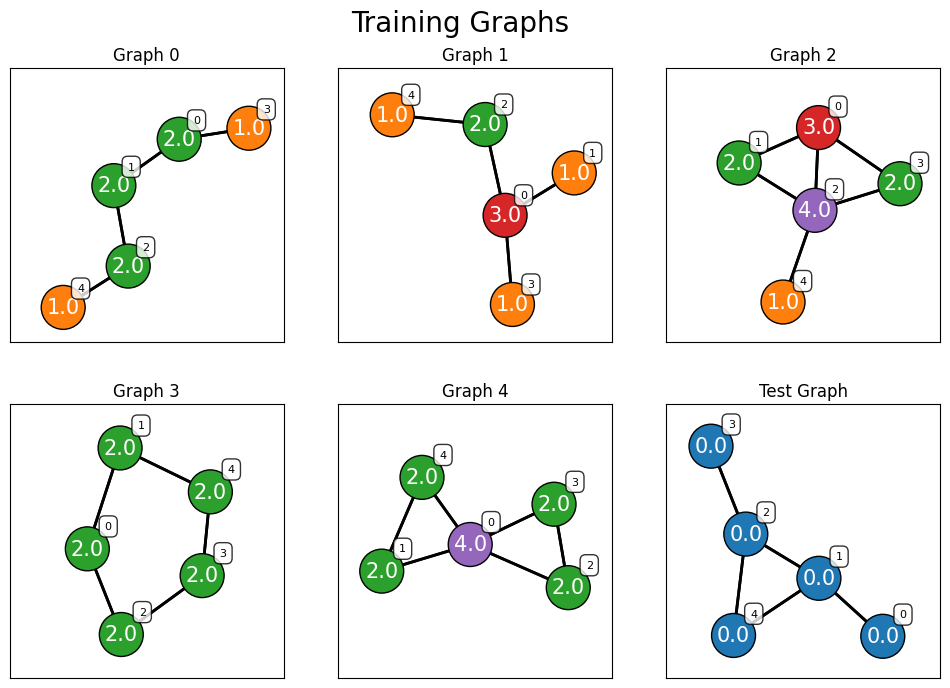

In [3]:
fig, axs = plt.subplots(2,3, figsize=(12,8))

for g, ax,i in zip([g0, g1, g2, g3, g4, g5], axs.flatten(), range(6)):
    g.x = g.y
    draw_graph(g, ax)
    ax.set_title(f'Graph {i}')

axs[1,2].set_title('Test Graph')
fig.suptitle('Training Graphs', fontsize=20, y=0.95)
save_plot(fig, 'TrainingGraph.png')


In [4]:
no_params_gnn = NoParamsGNN()
model = lambda graph: no_params_gnn(graph.x, graph.edge_index)

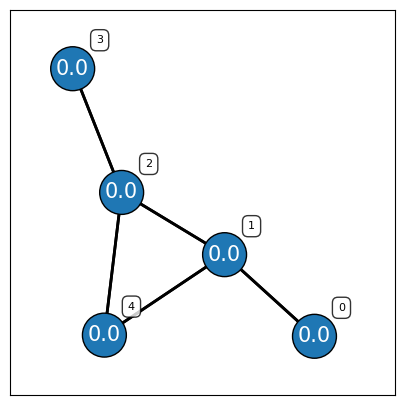

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

g5.x = model(g5)

draw_graph(g5, ax)

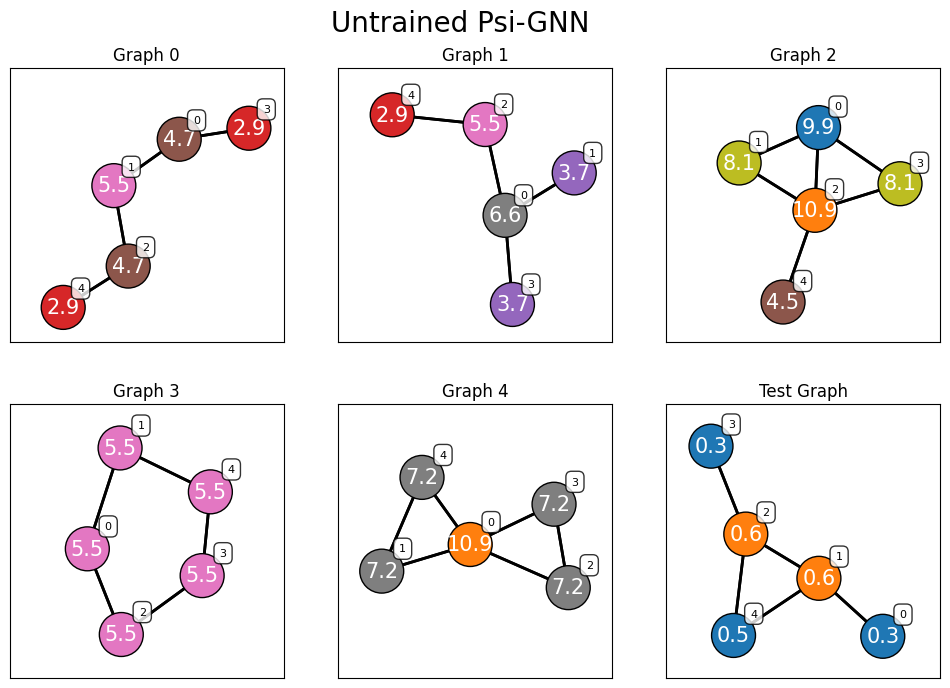

In [6]:
psi_gnn = PsiGNN(1, 1)
model = lambda graph: psi_gnn(graph.x, graph.edge_index)

fig, axs = plt.subplots(2,3, figsize=(12,8))

for g, ax,i in zip([g0, g1, g2, g3, g4, g5], axs.flatten(), range(6)):
    g_copy = g.clone()

    g_copy.x = model(g_copy)
    draw_graph(g_copy, ax)
    ax.set_title(f'Graph {i}')

axs[1,2].set_title('Test Graph')
fig.suptitle(r'Untrained Psi-GNN', fontsize=20, y=0.95)
save_plot(fig, 'UntrainedGNN.png')

In [7]:
epochs = 2500
psi_gnn = PsiGNN(1, 1)
model = lambda graph: psi_gnn(graph.x, graph.edge_index)

train_graphs = [g0, g1, g2, g3, g4]
optimizer = torch.optim.Adam(psi_gnn.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
for epoch in range(epochs):
    total_loss = 0
    for graph in train_graphs:
        optimizer.zero_grad()
        prediction = model(graph)
        loss = criterion(model(graph), graph.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_graphs)
    if (epoch+1) % 250 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')

c:\Users\tobia\anaconda3\envs\py312\Lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 250/2500, Loss: 3.3501
Epoch 500/2500, Loss: 0.7257
Epoch 750/2500, Loss: 0.7240
Epoch 1000/2500, Loss: 0.7234
Epoch 1250/2500, Loss: 0.7226
Epoch 1500/2500, Loss: 0.7217
Epoch 1750/2500, Loss: 0.7211
Epoch 2000/2500, Loss: 0.7209
Epoch 2250/2500, Loss: 0.7209
Epoch 2500/2500, Loss: 0.7209


In [8]:
model(g5)

tensor([0.7481, 1.4962, 1.4962, 0.7481, 1.1221], grad_fn=<ViewBackward0>)

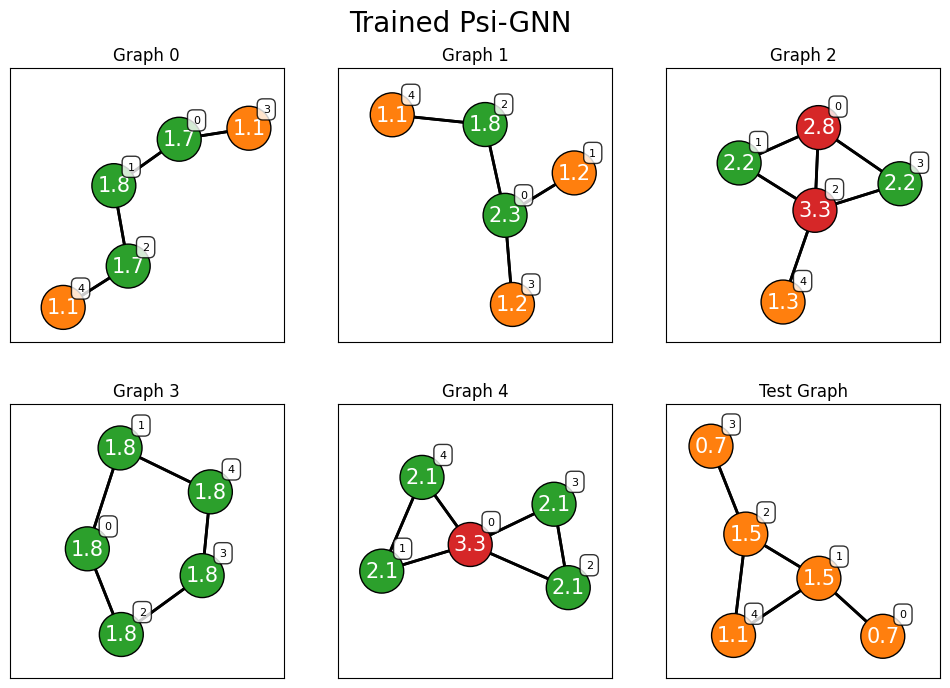

In [9]:
fig, axs = plt.subplots(2,3, figsize=(12,8))

for g, ax,i in zip([g0, g1, g2, g3, g4, g5], axs.flatten(), range(6)):
    g.xs = model(g)
    draw_graph(g, ax)
    ax.set_title(f'Graph {i}')

axs[1,2].set_title('Test Graph')
fig.suptitle('Trained Psi-GNN', fontsize=20, y=0.95)
save_plot(fig, 'TrainedPsiGNN.png')

In [10]:
#Dataset:

g0 = Data(edge_index=torch.tensor([
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4],
    [0, 1, 3, 0, 1, 2, 1, 2, 4, 0, 3, 2, 4]]), pos=torch.tensor([[4.963, 7.682],
    [3.074, 6.341],[3.489, 4.017],[6.977, 8.   ],[1.61 , 2.823]],dtype=torch.float32),
    y=torch.tensor([2, 2, 2, 1, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g1 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4],
    [0, 1, 2, 3, 0, 1, 0, 2, 4, 0, 3, 2, 4]]), pos=torch.tensor([[4.963, 4.012],
    [6.806, 5.142],[4.431, 6.432],[5.159, 1.636],[1.955, 6.691]], dtype=torch.float32),
    y=torch.tensor([3, 1, 2, 1, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g2 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4],
    [0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 0, 2, 3, 2, 4]]), pos=torch.tensor([[7.698, 7.945],
    [5.712, 7.06 ],[7.608, 5.876],[9.736, 6.541],[6.81 , 3.582]], dtype=torch.float32),
    y=torch.tensor([3, 2, 4, 2, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g3 = Data(edge_index=torch.tensor([
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    [0, 1, 2, 0, 1, 4, 0, 2, 3, 2, 3, 4, 1, 3, 4]]), pos=torch.tensor([[4.488, 7.382],
    [5.241, 9.701],[5.269, 5.412],[7.128, 6.766],[7.317, 8.692]], dtype=torch.float32),
    y=torch.tensor([2, 2, 2, 2, 2.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g4 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    [0, 1, 2, 3, 4, 0, 1, 4, 0, 2, 3, 0, 2, 3, 0, 1, 4]]), pos=torch.tensor([[2.753, 8.131],
    [0.719, 7.519],[5.007, 7.139],[4.68 , 9.057],[1.645, 9.674]], dtype=torch.float32),
    y=torch.tensor([4, 2, 2, 2, 2.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g5 = Data(edge_index=torch.tensor([
    [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4],
    [0, 1, 0, 1, 2, 4, 1, 2, 3, 4, 2, 3, 1, 2, 4]]), pos=torch.tensor([[4.554, 1.77 ],
    [3.023, 3.16 ],[1.27 , 4.22 ],[0.436, 6.327],[0.976, 1.79 ]], dtype=torch.float32),
    y=torch.tensor([0, 0, 0, 0, 0.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))

In [11]:
from torch_geometric.loader import DataLoader

epochs = 2500
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(psi_gnn.parameters(), lr=0.001)

train_graphs = [g0, g1, g2, g3, g4]
loader = DataLoader(train_graphs, batch_size=2, shuffle=True)

for epoch in range(epochs):
    total_loss = 0
    total_N = 0
    for graphs in loader:
        optimizer.zero_grad()
        
        loss = criterion(model(graphs), graphs.y)
        
        loss.backward()
        optimizer.step()

        N = len(graphs)
        total_N += N
        total_loss += loss.item() * N

    avg_loss = total_loss / total_N
    if (epoch+1) % 250 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')




c:\Users\tobia\anaconda3\envs\py312\Lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 250/2500, Loss: 0.9068
Epoch 500/2500, Loss: 0.8457
Epoch 750/2500, Loss: 0.9059
Epoch 1000/2500, Loss: 0.8458
Epoch 1250/2500, Loss: 0.8460
Epoch 1500/2500, Loss: 0.8457
Epoch 1750/2500, Loss: 0.7650
Epoch 2000/2500, Loss: 0.8456
Epoch 2250/2500, Loss: 0.7649
Epoch 2500/2500, Loss: 0.8456


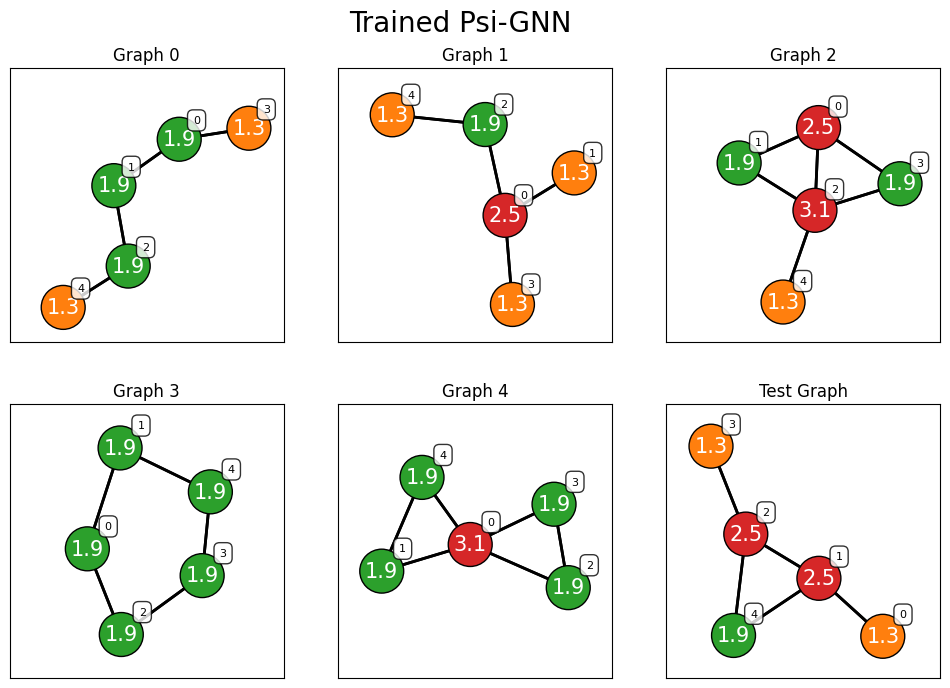

In [12]:
fig, axs = plt.subplots(2,3, figsize=(12,8))

for g, ax,i in zip([g0, g1, g2, g3, g4, g5], axs.flatten(), range(6)):
    g.xs = model(g)
    draw_graph(g, ax)
    ax.set_title(f'Graph {i}')
    
axs[1,2].set_title('Test Graph')
fig.suptitle('Trained Psi-GNN', fontsize=20, y=0.95)
save_plot(fig, 'TrainedPsiGNNwithLoader.png')

In [13]:
#Dataset:

g0 = Data(edge_index=torch.tensor([
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4],
    [0, 1, 3, 0, 1, 2, 1, 2, 4, 0, 3, 2, 4]]), pos=torch.tensor([[4.963, 7.682],
    [3.074, 6.341],[3.489, 4.017],[6.977, 8.   ],[1.61 , 2.823]],dtype=torch.float32),
    y=torch.tensor([2, 2, 2, 1, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g1 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4],
    [0, 1, 2, 3, 0, 1, 0, 2, 4, 0, 3, 2, 4]]), pos=torch.tensor([[4.963, 4.012],
    [6.806, 5.142],[4.431, 6.432],[5.159, 1.636],[1.955, 6.691]], dtype=torch.float32),
    y=torch.tensor([3, 1, 2, 1, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g2 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4],
    [0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 0, 2, 3, 2, 4]]), pos=torch.tensor([[7.698, 7.945],
    [5.712, 7.06 ],[7.608, 5.876],[9.736, 6.541],[6.81 , 3.582]], dtype=torch.float32),
    y=torch.tensor([3, 2, 4, 2, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g3 = Data(edge_index=torch.tensor([
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    [0, 1, 2, 0, 1, 4, 0, 2, 3, 2, 3, 4, 1, 3, 4]]), pos=torch.tensor([[4.488, 7.382],
    [5.241, 9.701],[5.269, 5.412],[7.128, 6.766],[7.317, 8.692]], dtype=torch.float32),
    y=torch.tensor([2, 2, 2, 2, 2.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g4 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    [0, 1, 2, 3, 4, 0, 1, 4, 0, 2, 3, 0, 2, 3, 0, 1, 4]]), pos=torch.tensor([[2.753, 8.131],
    [0.719, 7.519],[5.007, 7.139],[4.68 , 9.057],[1.645, 9.674]], dtype=torch.float32),
    y=torch.tensor([4, 2, 2, 2, 2.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g5 = Data(edge_index=torch.tensor([
    [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4],
    [0, 1, 0, 1, 2, 4, 1, 2, 3, 4, 2, 3, 1, 2, 4]]), pos=torch.tensor([[4.554, 1.77 ],
    [3.023, 3.16 ],[1.27 , 4.22 ],[0.436, 6.327],[0.976, 1.79 ]], dtype=torch.float32),
    y=torch.tensor([0, 0, 0, 0, 0.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))



In [14]:
phi_psi_gnn = PhiPsiGNN(1, 1)
model = lambda graph: phi_psi_gnn(graph.x, graph.edge_index)

epochs = 4000
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(phi_psi_gnn.parameters(), lr=0.001)

train_graphs = [g0, g1, g2, g3, g4]
loader = DataLoader(train_graphs, batch_size=2, shuffle=True)

print(phi_psi_gnn.phi.weight)
print(phi_psi_gnn.phi.bias)
print(phi_psi_gnn.psi.weight)
print(phi_psi_gnn.psi.bias)



Parameter containing:
tensor([[ 0.0012, -0.3996]], requires_grad=True)
Parameter containing:
tensor([-0.0973], requires_grad=True)
Parameter containing:
tensor([[0.7383]], requires_grad=True)
Parameter containing:
tensor([0.9209], requires_grad=True)


In [15]:
for epoch in range(epochs):
    total_loss = 0
    total_N = 0
    for graphs in loader:
        optimizer.zero_grad()
        
        loss = criterion(model(graphs), graphs.y.flatten())
        loss.backward()
        optimizer.step()

        N = len(graphs)
        total_N += N
        total_loss += loss.item() * N

    avg_loss = total_loss / total_N
    if (epoch+1) % 250 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')

Epoch 250/4000, Loss: 1.3241
Epoch 500/4000, Loss: 0.3254
Epoch 750/4000, Loss: 0.2782
Epoch 1000/4000, Loss: 0.2213
Epoch 1250/4000, Loss: 0.1578
Epoch 1500/4000, Loss: 0.0971
Epoch 1750/4000, Loss: 0.0493
Epoch 2000/4000, Loss: 0.0190
Epoch 2250/4000, Loss: 0.0051
Epoch 2500/4000, Loss: 0.0008
Epoch 2750/4000, Loss: 0.0000
Epoch 3000/4000, Loss: 0.0000
Epoch 3250/4000, Loss: 0.0000
Epoch 3500/4000, Loss: 0.0000
Epoch 3750/4000, Loss: 0.0000
Epoch 4000/4000, Loss: 0.0000


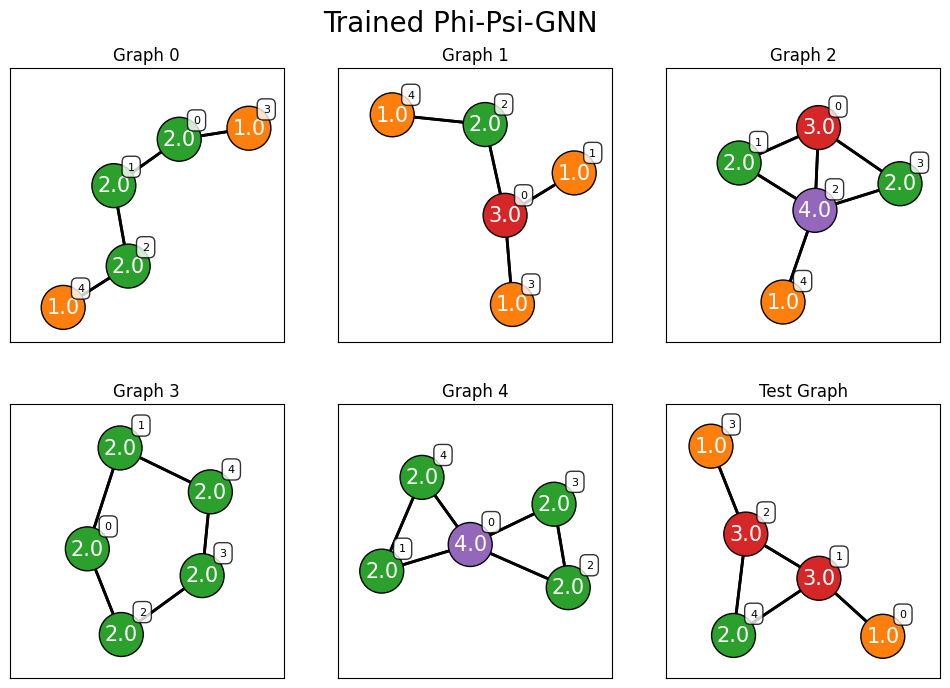

In [16]:
fig, axs = plt.subplots(2,3, figsize=(12,8))

for g, ax,i in zip([g0, g1, g2, g3, g4, g5], axs.flatten(), range(6)):
    g.xs = model(g)
    draw_graph(g, ax)
    ax.set_title(f'Graph {i}')


axs[1,2].set_title('Test Graph')
fig.suptitle('Trained Phi-Psi-GNN', fontsize=20, y=0.95)

save_plot(fig, 'TrainedPhiPsiGNN.png')

In [17]:
#Dataset:

g0 = Data(edge_index=torch.tensor([
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4],
    [0, 1, 3, 0, 1, 2, 1, 2, 4, 0, 3, 2, 4]]), pos=torch.tensor([[4.963, 7.682],
    [3.074, 6.341],[3.489, 4.017],[6.977, 8.   ],[1.61 , 2.823]],dtype=torch.float32),
    y=torch.tensor([2, 2, 2, 1, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g1 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4],
    [0, 1, 2, 3, 0, 1, 0, 2, 4, 0, 3, 2, 4]]), pos=torch.tensor([[4.963, 4.012],
    [6.806, 5.142],[4.431, 6.432],[5.159, 1.636],[1.955, 6.691]], dtype=torch.float32),
    y=torch.tensor([3, 1, 2, 1, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g2 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4],
    [0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 0, 2, 3, 2, 4]]), pos=torch.tensor([[7.698, 7.945],
    [5.712, 7.06 ],[7.608, 5.876],[9.736, 6.541],[6.81 , 3.582]], dtype=torch.float32),
    y=torch.tensor([3, 2, 4, 2, 1.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g3 = Data(edge_index=torch.tensor([
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    [0, 1, 2, 0, 1, 4, 0, 2, 3, 2, 3, 4, 1, 3, 4]]), pos=torch.tensor([[4.488, 7.382],
    [5.241, 9.701],[5.269, 5.412],[7.128, 6.766],[7.317, 8.692]], dtype=torch.float32),
    y=torch.tensor([2, 2, 2, 2, 2.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g4 = Data(edge_index=torch.tensor([
    [0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    [0, 1, 2, 3, 4, 0, 1, 4, 0, 2, 3, 0, 2, 3, 0, 1, 4]]), pos=torch.tensor([[2.753, 8.131],
    [0.719, 7.519],[5.007, 7.139],[4.68 , 9.057],[1.645, 9.674]], dtype=torch.float32),
    y=torch.tensor([4, 2, 2, 2, 2.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))
g5 = Data(edge_index=torch.tensor([
    [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4],
    [0, 1, 0, 1, 2, 4, 1, 2, 3, 4, 2, 3, 1, 2, 4]]), pos=torch.tensor([[4.554, 1.77 ],
    [3.023, 3.16 ],[1.27 , 4.22 ],[0.436, 6.327],[0.976, 1.79 ]], dtype=torch.float32),
    y=torch.tensor([0, 0, 0, 0, 0.],dtype=torch.float32).view(-1,1), x=torch.ones(5,1))



all_graphs_global_labels_only = []
for graph in [g0, g1, g2, g3, g4, g5]:
    g = Data(edge_index=graph.edge_index, x=graph.x, pos=graph.pos, y=torch.sum(graph.y/2))
    all_graphs_global_labels_only.append(g)

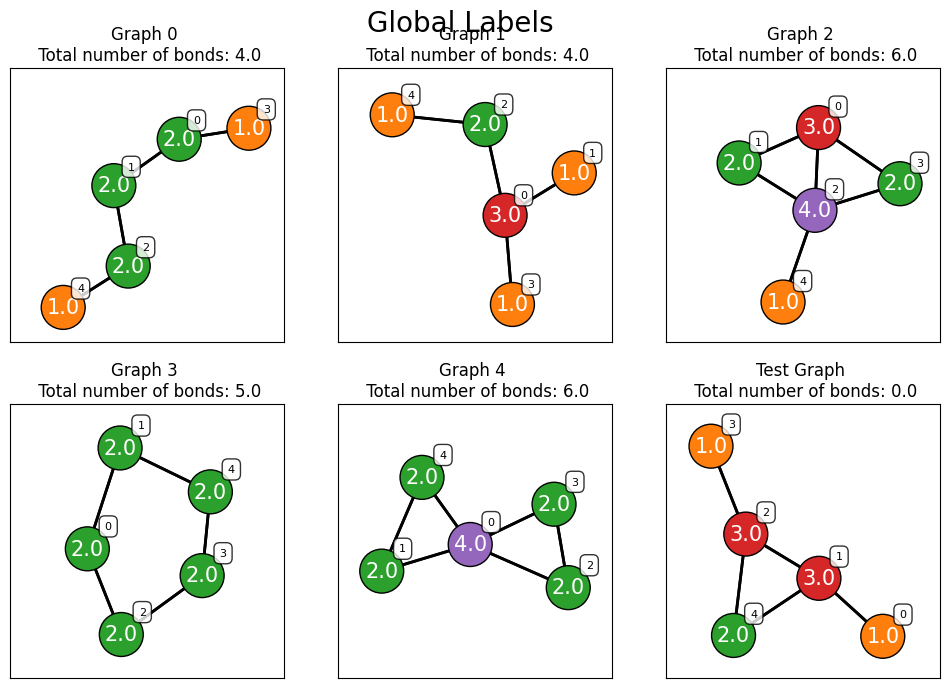

In [18]:
fig, axs = plt.subplots(2,3, figsize=(12,8))
for g, ax,i in zip(all_graphs_global_labels_only, axs.flatten(), range(6)):
    g.xs = model(g)
    draw_graph(g, ax)
    ax.set_title(f'Graph {i} \n Total number of bonds: {g.y.item()}')

axs[1,2].set_title(f'Test Graph \n Total number of bonds: {all_graphs_global_labels_only[-1].y.item()}')
fig.suptitle('Global Labels', fontsize=20, y=0.95)
save_plot(fig, 'GlobalLabelsOnly.png')
    

In [19]:
aggr_phi_psi_gnn = AggrPhiPsiGNN(1, 1)
model_aggr = lambda graph: aggr_phi_psi_gnn(graph.x, graph.edge_index, graph.batch)

global_loader = DataLoader(all_graphs_global_labels_only[:-1], batch_size=2, shuffle=True)

epochs = 5000
optimizer = torch.optim.Adam(aggr_phi_psi_gnn.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

for epoch in range(epochs):
    total_loss = 0
    total_N = 0
    for graphs in global_loader:
        optimizer.zero_grad()
        prediction = model_aggr(graphs)[1]
        loss = criterion(prediction.flatten(), graphs.y)
        loss.backward()
        optimizer.step()

        N = len(graphs)
        total_N += N
        total_loss += loss.item() * N

    avg_loss = total_loss / total_N
    if (epoch+1) % 250 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')

Epoch 250/5000, Loss: 0.1224
Epoch 500/5000, Loss: 0.0877
Epoch 750/5000, Loss: 0.0548
Epoch 1000/5000, Loss: 0.0299
Epoch 1250/5000, Loss: 0.0135
Epoch 1500/5000, Loss: 0.0045
Epoch 1750/5000, Loss: 0.0010
Epoch 2000/5000, Loss: 0.0001
Epoch 2250/5000, Loss: 0.0000
Epoch 2500/5000, Loss: 0.0000
Epoch 2750/5000, Loss: 0.0000
Epoch 3000/5000, Loss: 0.0000
Epoch 3250/5000, Loss: 0.0000
Epoch 3500/5000, Loss: 0.0000
Epoch 3750/5000, Loss: 0.0000
Epoch 4000/5000, Loss: 0.0000
Epoch 4250/5000, Loss: 0.0000
Epoch 4500/5000, Loss: 0.0000
Epoch 4750/5000, Loss: 0.0000
Epoch 5000/5000, Loss: 0.0000


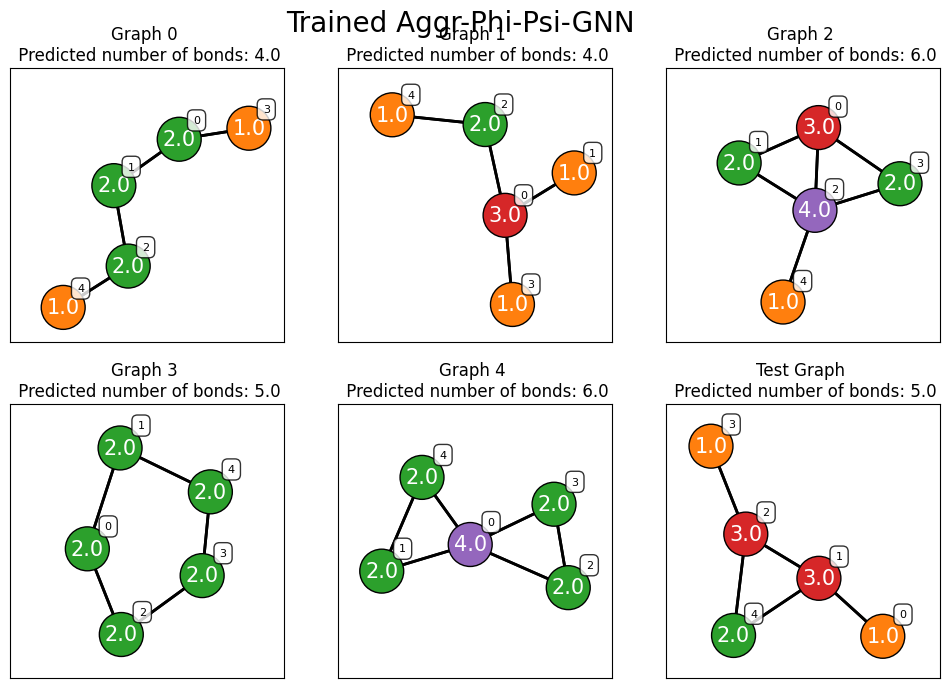

In [20]:
fig, axs = plt.subplots(2,3, figsize=(12,8))


for g, ax,i in zip(all_graphs_global_labels_only, axs.flatten(), range(6)):
    g.xs = model(g)
    draw_graph(g, ax)
    ax.set_title(f'Graph {i} \n Predicted number of bonds: {model_aggr(g)[1].item():.1f}')

axs[1,2].set_title(f'Test Graph \n Predicted number of bonds: {model_aggr(all_graphs_global_labels_only[-1])[1].item():.1f}')

fig.suptitle('Trained Aggr-Phi-Psi-GNN', fontsize=20, y=0.95)
save_plot(fig, 'TrainedAggrPhiPsiGNN.png')
    